In [6]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [64]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime


In [42]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
url = "https://feeds.bbci.co.uk/news/rss.xml"

In [8]:
response = requests.get(url)
soup=BeautifulSoup(response.text, "html.parser")


In [16]:
items=soup.findAll('item')

In [22]:
item=items[1]

<item>
<title><![CDATA[The online black market cashing in on weight loss jab hype]]></title>
<description><![CDATA[Doctors warn drugs from unregulated sources could contain potentially toxic ingredients.]]></description>
<link/>https://www.bbc.co.uk/news/health-67414203?at_medium=RSS&amp;at_campaign=KARANGA
            <guid ispermalink="false">https://www.bbc.co.uk/news/health-67414203</guid>
<pubdate>Wed, 15 Nov 2023 06:00:33 GMT</pubdate>
</item>

In [44]:
item.title.text

'The online black market cashing in on weight loss jab hype'

In [28]:
news_items=[]

In [31]:
for i in items:
    news_i={}
    news_i['title']=i.title.text
    news_i['description']=i.description.text
    news_i['pubdate']=i.pubdate.text
    news_items.append(news_i)

In [32]:
news_items

[{'title': 'NHS England promises to eliminate cervical cancer by 2040',
  'description': 'Jabs are to be offered in libraries and sports venues to improve access, the boss of NHS England will say.',
  'pubdate': 'Wed, 15 Nov 2023 00:59:30 GMT'},
 {'title': 'The online black market cashing in on weight loss jab hype',
  'description': 'Doctors warn drugs from unregulated sources could contain potentially toxic ingredients.',
  'pubdate': 'Wed, 15 Nov 2023 06:00:33 GMT'},
 {'title': 'Wimbledon fatal school crash parents search for answers',
  'description': 'Nuria Sajjad was taking a photo with her mum when she was killed by a car that crashed into her school.',
  'pubdate': 'Wed, 15 Nov 2023 07:38:26 GMT'},
 {'title': "Brazil: Health warnings as country gripped by 'unbearable' heatwave",
  'description': 'More than a hundred million people are thought to have been affected by the extreme weather.',
  'pubdate': 'Wed, 15 Nov 2023 05:05:41 GMT'},
 {'title': 'Keir Starmer pushes for Labour

In [33]:
#mettre et convertir en BDD
df = pd.DataFrame(news_items, columns=['title', 'description', 'pubdate'])

In [34]:
df.head()

,title,description,pubdate
0,NHS England promises to eliminate cervical can...,Jabs are to be offered in libraries and sports...,"Wed, 15 Nov 2023 00:59:30 GMT"
1,The online black market cashing in on weight l...,Doctors warn drugs from unregulated sources co...,"Wed, 15 Nov 2023 06:00:33 GMT"
2,Wimbledon fatal school crash parents search fo...,Nuria Sajjad was taking a photo with her mum w...,"Wed, 15 Nov 2023 07:38:26 GMT"
3,Brazil: Health warnings as country gripped by ...,More than a hundred million people are thought...,"Wed, 15 Nov 2023 05:05:41 GMT"
4,Keir Starmer pushes for Labour vote on Gaza co...,The Labour leader is trying to unite his party...,"Wed, 15 Nov 2023 08:12:33 GMT"


In [41]:
#generer le fichier csv
df.to_csv('web_scrapping.csv', index=False, encoding='utf-8')

In [50]:
mon_csv = 'web_scrapping'
df2 = pd.read_csv(web_scrapping)

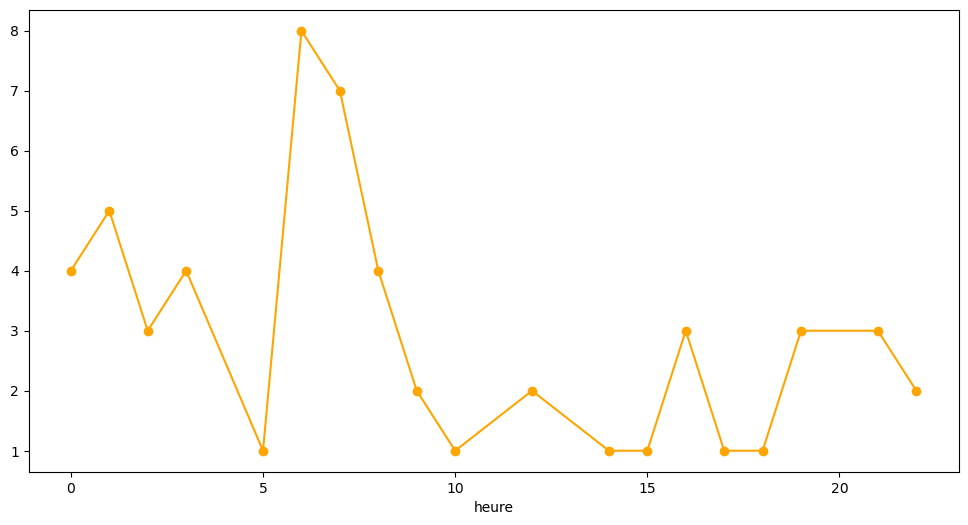

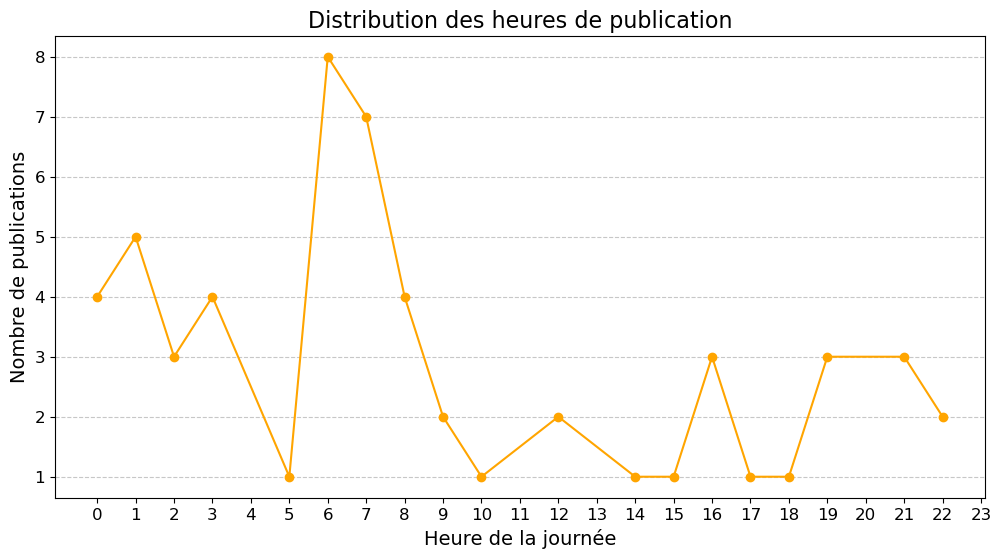

In [65]:
df['pubdate'] = pd.to_datetime(df['pubdate'])

# Extraire l'heure de chaque objet datetime
df['heure'] = df['pubdate'].dt.hour

# Créer un graphique de lignes
plt.figure(figsize=(12, 6))  # Ajustez la taille selon vos préférences

# Triez les données par heure avant de les tracer
df['heure'].value_counts().sort_index().plot(marker='o', color='orange', linestyle='-')

plt.figure(figsize=(12, 6))  # Ajustez la taille selon vos préférences
plt.plot(df['heure'].value_counts().sort_index(), marker='o', color='orange', linestyle='-')


plt.title('Distribution des heures de publication', fontsize=16)
plt.xlabel('Heure de la journée', fontsize=14)
plt.ylabel('Nombre de publications', fontsize=14)
plt.xticks(range(24), fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Afficher le graphique
plt.show()